<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-JuanMelendres/blob/main/LabModule4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Juan Melendres - A00369017

# **Module 4 - Model Development**

**Lab - Model Development**

In [4]:
# Import Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [5]:
# Import dataset
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'

In [6]:
# Load the data and store it in dataframe df
df = pd.read_csv(path)
df.head(5)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


1. Linear Regression and Multiple Linear Regression
Linear Regression **texto en negrita**

One example of a Data Model that we will be using is:
Simple Linear Regression

Simple Linear Regression is a method to help us understand the relationship between two variables:

    The predictor/independent variable (X)
    The response/dependent variable (that we want to predict)(Y)


In [7]:
# Create the linear regression object:
lm = LinearRegression()
lm

LinearRegression()

In [8]:
'''
How could "highway-mpg" help us predict car price?
For this example, we want to look at how highway-mpg can help us predict car price. 
Using simple linear regression, we will create a linear function with "highway-mpg" as the predictor variable and the "price" as the response variable.
'''
X = df[['highway-mpg']]
Y = df['price']

In [9]:
# Fit the linear model using highway-mpg:
lm.fit(X,Y)

LinearRegression()

In [10]:
# We can output a prediction:
Yhat = lm.predict(X)
Yhat[0:5]   

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [11]:
# What is the value of the intercept (a)?
lm.intercept_

38423.3058581574

In [12]:
# What is the value of the slope (b)?
lm.coef_

array([-821.73337832])

In [13]:
'''
Question #1 a): Create a linear regression object called "lm1".
'''
lm1 = LinearRegression()
lm1

LinearRegression()

In [14]:
'''
Question #1 b): Train the model using "engine-size" as the independent variable and "price" as the dependent variable?
'''
lm1.fit(df[['engine-size']], df[['price']])
lm1

LinearRegression()

In [15]:
'''
Question #1 c): Find the slope and intercept of the model.
'''
# Slope 
print(lm1.coef_)
# Intercept
print(lm1.intercept_)

[[166.86001569]]
[-7963.33890628]


In [16]:
'''
Question #1 d): What is the equation of the predicted line? You can use x and yhat or "engine-size" or "price".
'''
# using X and Y  
# using X and Y  
Yhat = -7963.34 + 166.86 * X
Price = -7963.34 + 166.86 * df['engine-size']

Multiple Linear Regression

What if we want to predict car price using more than one variable?

If we want to use more variables in our model to predict car price, we can use Multiple Linear Regression. Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and two or more predictor (independent) variables.

In [17]:
# Let's develop a model using these variables as the predictor variables.
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [18]:
# Fit the linear model using the four above-mentioned variables.
lm.fit(Z, df['price'])

LinearRegression()

In [19]:
# What is the value of the intercept(a)?
lm.intercept_

-15806.62462632922

In [20]:
# What are the values of the coefficients (b1, b2, b3, b4)?
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [21]:
'''
Question #2 a): Create and train a Multiple Linear Regression model "lm2" where the response variable is "price", and the predictor variable is "normalized-losses" and "highway-mpg". 
'''
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses' , 'highway-mpg']],df['price'])

LinearRegression()

In [22]:
'''
Question #2 b): Find the coefficient of the model. 
'''
lm2.coef_

array([   1.49789586, -820.45434016])

2. **Model Evaluation Using Visualization**

Now that we've developed some models, how do we evaluate our models and choose the best one? One way to do this is by using a visualization.

Regression Plot

When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using regression plots.

This plot will show a combination of a scattered data points (a scatterplot), as well as the fitted linear regression line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).


(0.0, 48175.10262685277)

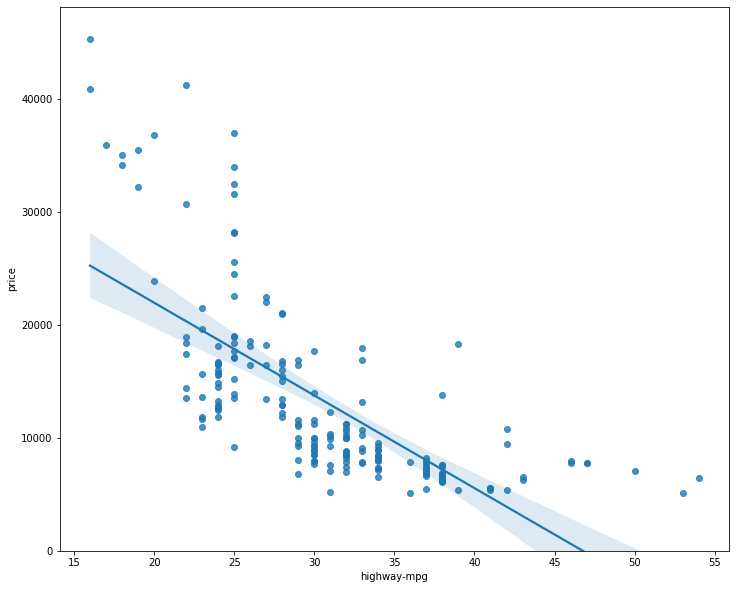

In [23]:
# Let's visualize highway-mpg as potential predictor variable of price:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x = "highway-mpg", y = "price", data = df)
plt.ylim(0,)

(0.0, 47414.1)

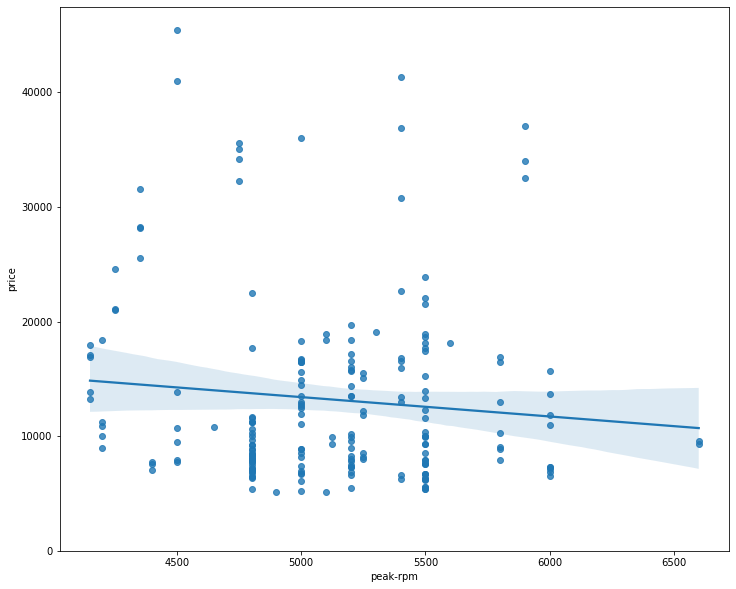

In [24]:
# Let's compare this plot to the regression plot of "peak-rpm".
plt.figure(figsize=(width, height))
sns.regplot(x = "peak-rpm", y = "price", data = df)
plt.ylim(0,)

In [25]:
'''
Question #3: Given the regression plots above, is "peak-rpm" or "highway-mpg" more strongly correlated with "price"? Use the method ".corr()" to verify your answer.
'''
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


Residual Plot

A good way to visualize the variance of the data is to use a residual plot.

What is a residual?

The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

So what is a residual plot?

A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

What do we pay attention to when looking at a residual plot?

We look at the spread of the residuals:

- If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


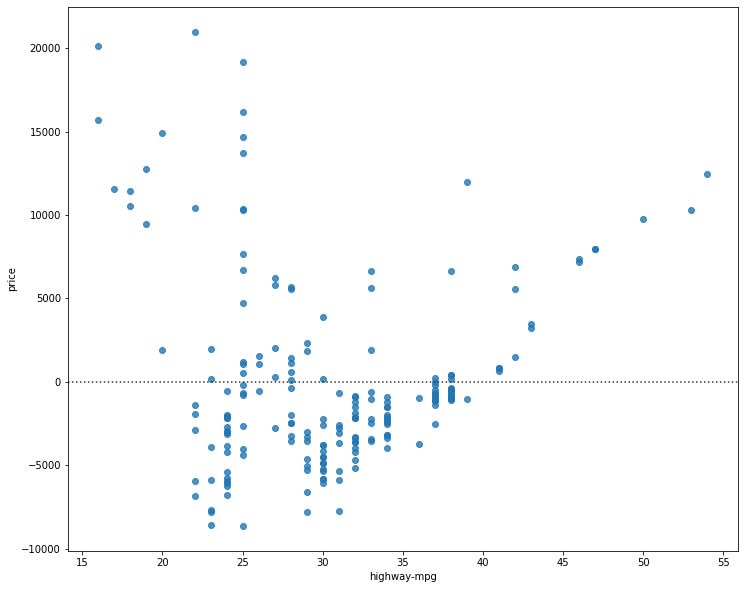

In [26]:
width = 12
height = 10
plt.figure(figsize = (width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

**Multiple Linear Regression**

In [27]:
Y_hat = lm.predict(Z)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


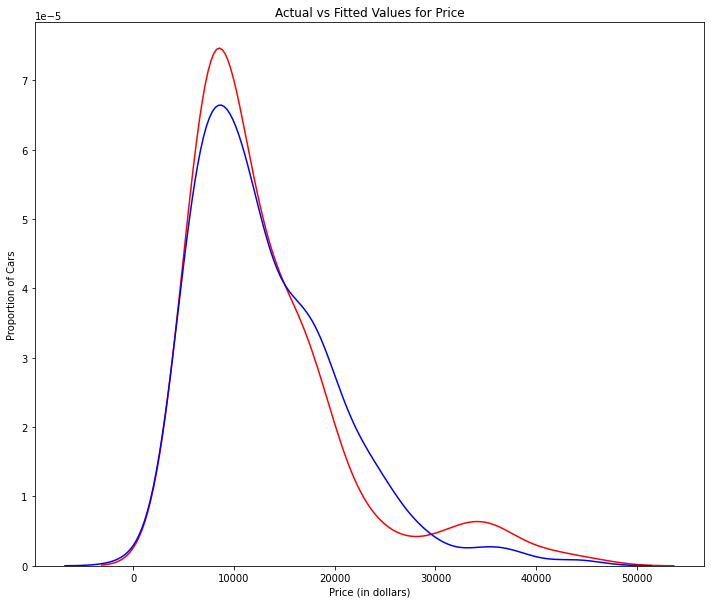

In [28]:
plt.figure(figsize=(width, height))

ax1 = sns.distplot(df['price'], hist = False, color = "r", label = "Actual Value")
sns.distplot(Y_hat, hist = False, color = "b", label = "Fitted Values" , ax = ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

3. **Polynomial Regression and Pipelines**

Polynomial regression is a particular case of the general linear regression model or multiple linear regression models.

We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.

In [29]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [30]:
# Let's get the variables:
x = df['highway-mpg']
y = df['price']

In [31]:
# Let's fit the polynomial using the function polyfit, then use the function poly1d to display the polynomial function.
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


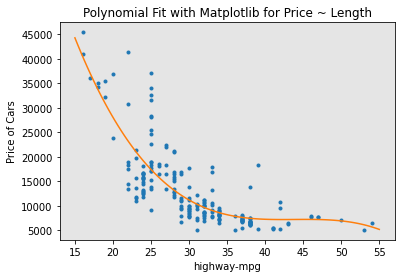

In [32]:
# Let's plot the function:
PlotPolly(p, x, y, 'highway-mpg')

In [33]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


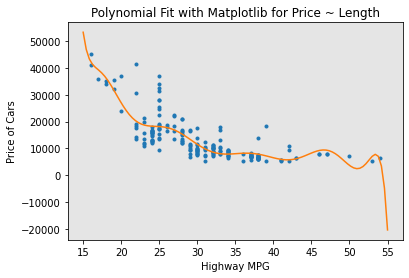

In [34]:
'''
Question #4: Create 11 order polynomial model with the variables x and y from above.
'''
# Here we use a polynomial of the 11rd order (cubic) 
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

In [35]:
# We create a PolynomialFeatures object of degree 2:
pr = PolynomialFeatures(degree = 2)
pr

PolynomialFeatures()

In [36]:
Z_pr = pr.fit_transform(Z)

In [37]:
# In the original data, there are 201 samples and 4 features.
Z.shape

(201, 4)

In [38]:
# After the transformation, there are 201 samples and 15 features.
Z_pr.shape

(201, 15)

Pipeline

Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline. We also use StandardScaler as a step in our pipeline.


In [39]:
# We create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor.
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias = False)), ('model', LinearRegression())]

In [40]:
# We input the list as an argument to the pipeline constructor:
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [41]:
# Then, we can normalize the data, perform a transform and fit the model simultaneously.
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [42]:
# Similarly, we can normalize the data, perform a transform and produce a prediction simultaneously.
ypipe = pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [43]:
'''
Question #5: Create a pipeline that standardizes the data, then produce a prediction using a linear regression model using the features Z and target y.
'''
Input = [('scale', StandardScaler()), ('model', LinearRegression())]

pipe = Pipeline(Input)
pipe.fit(Z,y)

ypipe = pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

4. **Measures for In-Sample Evaluation**

When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.

Two very important measures that are often used in Statistics to determine the accuracy of a model are:

    R^2 / R-squared
    Mean Squared Error (MSE)

R-squared

R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.

The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.

Mean Squared Error (MSE)

The Mean Squared Error measures the average of the squares of errors. That is, the difference between actual value (y) and the estimated value (ŷ).


In [44]:
# Model 1: Simple Linear Regression
# Let's calculate the R^2:
# highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


In [45]:
# We can predict the output i.e., "yhat" using the predict method, where X is the input variable:
Yhat = lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [46]:
# We can compare the predicted results with the actual results:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


In [47]:
# Model 2: Multiple Linear Regression
# Let's calculate the R^2:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [48]:
# We produce a prediction:
Y_predict_multifit = lm.predict(Z)

In [49]:
# We compare the predicted results with the actual results:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


In [50]:
# Model 3: Polynomial Fit
# Let's calculate the R^2.
#Let’s import the function r2_score from the module metrics as we are using a different function.
from sklearn.metrics import r2_score

In [51]:
# We apply the function to get the value of R^2:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


In [52]:
# MSE
# We can also calculate the MSE:
mean_squared_error(df['price'], p(x))

20474146.426361218

5. Prediction and Decision Making
Prediction **texto en negrita**

In the previous section, we trained the model using the method fit. Now we will use the method predict to produce a prediction. Lets import pyplot for plotting; we will also be using some functions from numpy.


In [53]:
# Create a new input:
new_input = np.arange(1, 100, 1).reshape(-1, 1)

In [54]:
# Fit the model:
lm.fit(X, Y)
lm

LinearRegression()

In [55]:
# Produce a prediction:
yhat = lm.predict(new_input)
yhat[0:5]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

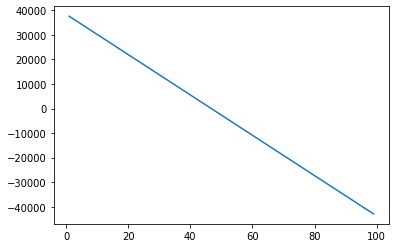

In [56]:
# We can plot the data:
plt.plot(new_input, yhat)
plt.show()

# **Graded Review Questions**

**Question 1 - Let X be a dataframe with 100 rows and 5 columns. Let y be the target with 100 samples. Assuming all the relevant libraries and data have been imported, the following line of code has been executed: LR = LinearRegression();LR.fit(X, y); yhat = LR.predict(X); How many samples does yhat contain?**
ANS: 100

**Question 2 - What value of R^2 (coefficient of determination) indicates your model performs best?**
ANS: 1 

**Question 3 - Which statement is true about polynomial linear regression?**
ANS: Although the predictor variables of polynomial linear regression are not linear, the relationship between the parameters or coefficients is linear.  

**Question 4 - The larger the mean squared error, the better your model performs:**
ANS: False

**Question 5 - Assume all the libraries are imported. y is the target and X is the features or dependent variables. Consider the following lines of code: Input = [('scale',StandardScaler()),('model',LinearRegression())]; pipe = Pipeline(Input); pipe.fit(X,y); ypipe = pipe.predict(X); What is the result of ypipe?**
ANS: Standardize the data, then perform prediction using a linear regression model.

# **Course Progress for 'a00369017' (a00369017@tec.mx)**
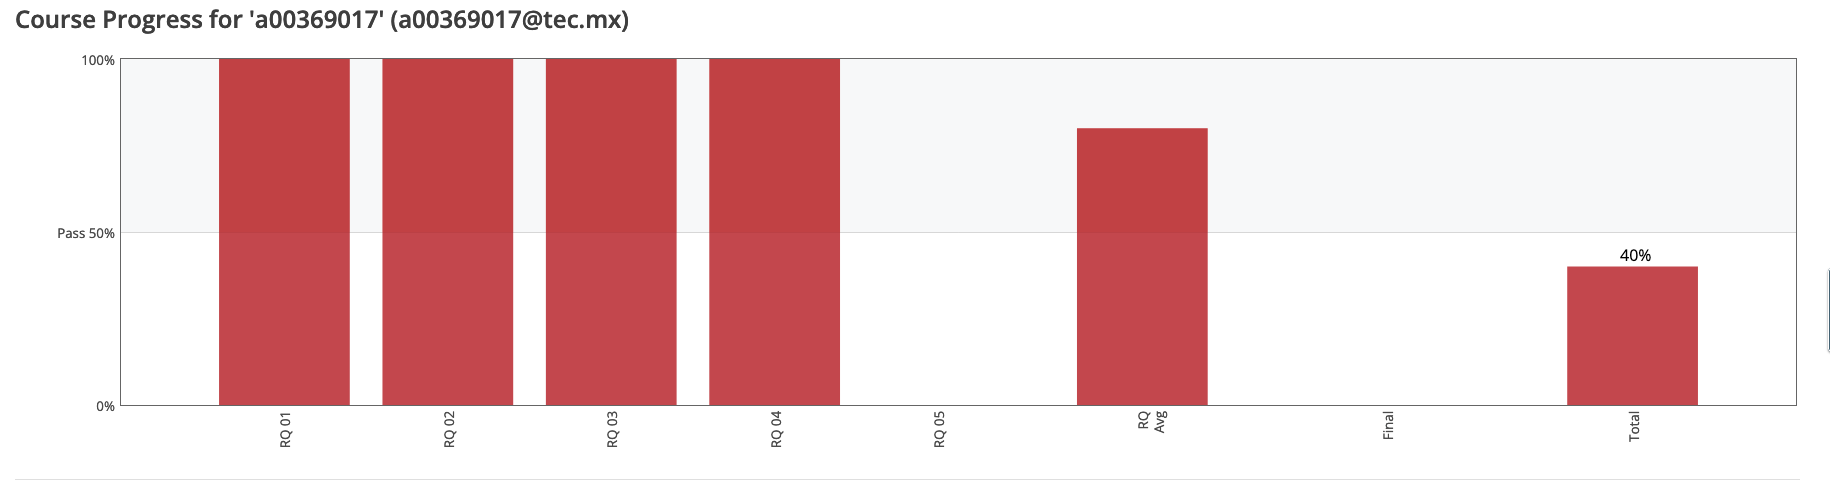